# Scrapy Basics
28 April 2019

### Import libraries

In [ ]:
import csv
import time
import string
import requests
import json
import numpy
import pandas as pd
import scrapy
from scrapy.crawler import CrawlerProcess

### Inspect site source code: https://rakeshbhatia.github.io/notes/

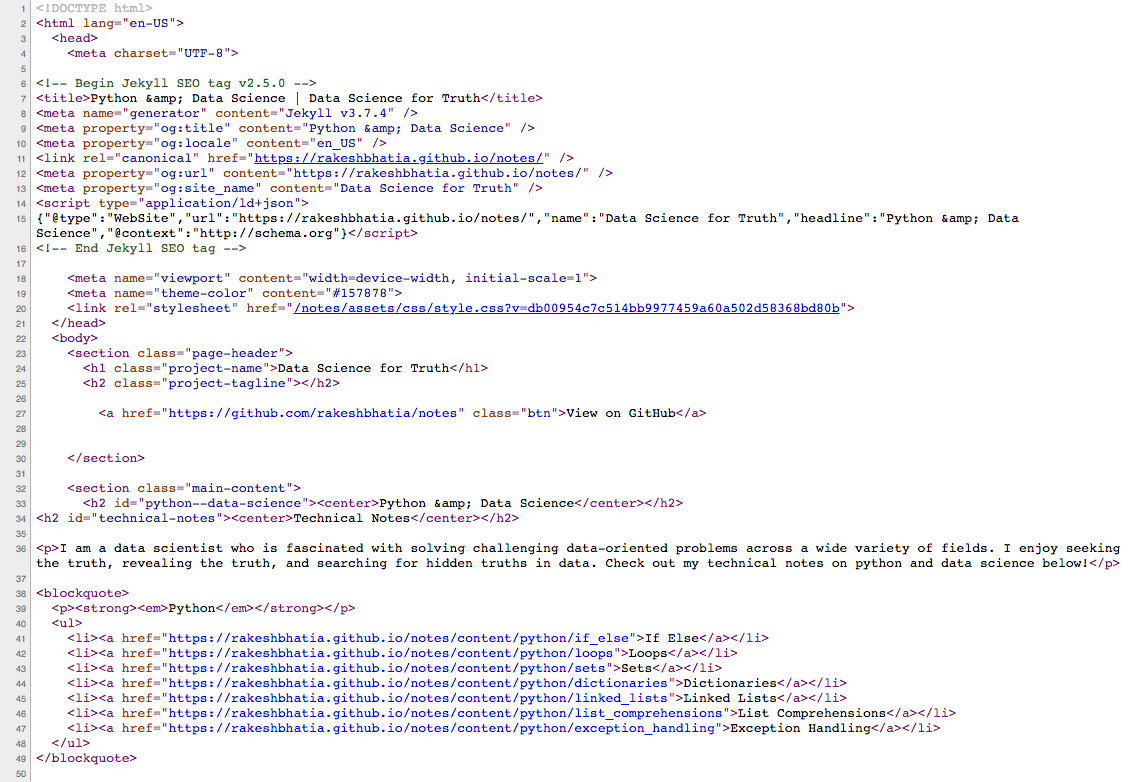

### Begin creating our scraper
* Declare your spider class
* Create a name for the spider
* Provide a list of start urls

In [ ]:
# Create a new spider class
class NotesSpider(scrapy.Spider):
    # Name our spider
    name = "NS"
    
    # URL(s) to start with.
    start_urls = [
        'https://rakeshbhatia.github.io/notes/'
    ]

## Scrapy crawler using XPath selectors
* Selectors are a mechanism to extract data from an XML document
* XPath is a language used for selecting nodes in XML documents
* XPath selectors allow you to navigate anywhere inside the DOM tree
    * They are more powerful than CSS selectors, which have limited navigation
    * They enable selection, filtering, and fine-grained text extraction
* The `xpath()` method returns a `SelectorList` instance, which is a list of new selectors
* Nested data can be quickly selected from the list returned by `xpath()`

### Define the `parse` method
* Extract the main header `h2` tag element
* Extract the subheader `h2` tag element

In [ ]:
class NotesSpider(scrapy.Spider):

    # ...

    # Use XPath to parse the response we get
    def parse(self, response):
        main_header = response.xpath('//*[@id="python--data-science"]').extract()  
        print('main_header: ', main_header)

        sub_header = response.xpath('//*[@id="technical-notes"]').extract()
        print('sub_header: ', sub_header)

### Extract `li` tag list elements from the first `blockquote` tag element
* First use `xpath()` to obtain a list of selectors containing data for the `li` tag elements
* Then iterate through the list of selectors to extract the following:
    * Text from the nested `a` tag element
    * Text from the `href` attribute

In [ ]:
class NotesSpider(scrapy.Spider):

    # ...

    # Use XPath to parse the response we get
    def parse(self, response):
        
        # ...
        
        # Get li tag elements from first blockquote
        list_items = response.xpath('/html/body/section[2]/blockquote[1]/ul//li')
        print('list_items: ', list_items)            
        
        # Yield each post title and post url to output json file
        for li in list_items:
            yield {
                'Post Title': li.xpath('./a/text()').extract_first(),
                'Post URL': li.xpath('./a/@href').extract_first()
            }
            

### Pass in settings and start the crawler

In [ ]:
class NotesSpider(scrapy.Spider):
    
    # ...

    # Use XPath to parse the response we get
    def parse(self, response):
        
        # ...
        
        # ...
        
# Pass in settings
process = CrawlerProcess({
    'FEED_FORMAT': 'json',           # Save our data as json
    'FEED_URI': 'scrapy_basics.json', # Specify the json output file
    'DOWNLOAD_DELAY': 0.50,          # Set a delay of 0.5 seconds
    'LOG_ENABLED': False             # For debugging, change this to true
})

# Start the crawler
process.crawl(NotesSpider)
process.start()
print('Scraping completed.')

### Our complete scrapy crawler using XPath selectors

In [1]:
import csv
import time
import string
import requests
import json
import numpy
import pandas as pd
import scrapy
from scrapy.crawler import CrawlerProcess

# Create a new spider class
class NotesSpider(scrapy.Spider):
    # Name our spider
    name = "NS"
    
    # URL(s) to start with.
    start_urls = [
        'https://rakeshbhatia.github.io/notes/'
    ]

    # Parse the response using XPath selectors
    def parse(self, response):
        # Get first h2 text
        first_header = response.xpath('//*[@id="python--data-science"]/center/text()').extract_first()
        print('first_header: ', first_header)
        
        #Get second h2 text
        second_header = response.xpath('//*[@id="technical-notes"]/center/text()').extract_first()
        print('second_header: ', second_header)
        
        # Get a list of selectors with li tag elements from the first blockquote
        list_items = response.xpath('/html/body/section[2]/blockquote[1]/ul//li')
        print('list_items: ', list_items)            
        
        # Yield each post title and post url to output json file
        for li in list_items:
            print('Post Title: ', li.xpath('./a/text()').extract_first())
            print('Post URL: ', li.xpath('./a/@href').extract_first())
            yield {
                'Post Title': li.xpath('./a/text()').extract_first(),
                'Post URL': li.xpath('./a/@href').extract_first()
            }
            
# Pass in settings
process = CrawlerProcess({
    'FEED_FORMAT': 'json',           # Save our data as json
    'FEED_URI': 'scrapy_basics_xpath.json', # Specify the json output file
    'DOWNLOAD_DELAY': 0.50,          # Set a delay of 0.5 seconds
    'LOG_ENABLED': False             # For debugging, change this to true
})

# Start the crawler
process.crawl(NotesSpider)
process.start()
print('Scraping completed.')

first_header:  Python & Data Science
second_header:  Technical Notes
list_items:  [<Selector xpath='/html/body/section[2]/blockquote[1]/ul//li' data='<li><a href="https://rakeshbhatia.github'>, <Selector xpath='/html/body/section[2]/blockquote[1]/ul//li' data='<li><a href="https://rakeshbhatia.github'>, <Selector xpath='/html/body/section[2]/blockquote[1]/ul//li' data='<li><a href="https://rakeshbhatia.github'>, <Selector xpath='/html/body/section[2]/blockquote[1]/ul//li' data='<li><a href="https://rakeshbhatia.github'>, <Selector xpath='/html/body/section[2]/blockquote[1]/ul//li' data='<li><a href="https://rakeshbhatia.github'>, <Selector xpath='/html/body/section[2]/blockquote[1]/ul//li' data='<li><a href="https://rakeshbhatia.github'>, <Selector xpath='/html/body/section[2]/blockquote[1]/ul//li' data='<li><a href="https://rakeshbhatia.github'>]
Post Title:  If Else
Post URL:  https://rakeshbhatia.github.io/notes/content/python/if_else
Post Title:  Loops
Post URL:  https://rakeshbhat

### Inspect JSON output file

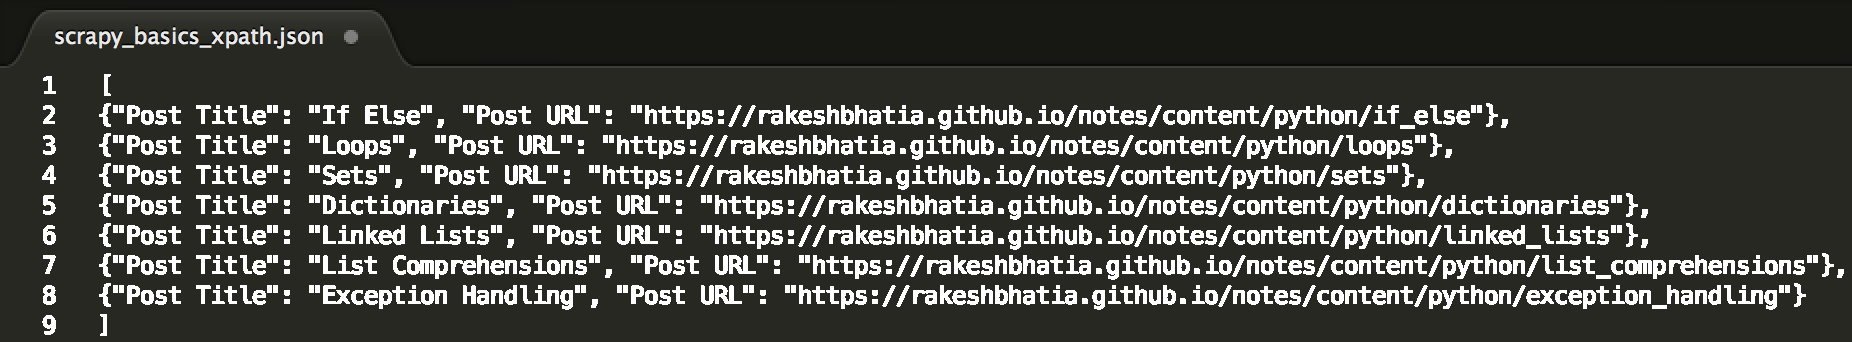

To use JSON as our feed format, we must yield our desired data in the form of a dictionary-like object. Sure enough, we can see that our JSON data was correctly printed to the output file. We have our requisite JSON dictionary object consisting of two keys, "Post Title" and "Post URL".

## Scrapy crawler using CSS selectors
* CSS is a styling language for HTML documents
* CSS selectors can select attribute or text nodes using CSS3 pseudo-elements
* Every step will be virtually the same as our scraper using XPath selectors
    * The only difference will be the use of the `.css()` function instead of `.xpath()`
* For most cases, you will likely use XPath selectors, which are more flexible and robust
    * However, in some specific instances, it might be advantageous to use CSS selectors instead
    * For example, if you want to locate a `button` element that has a particular `id` and/or `class` attribute
* Note the differences in the form of the argument to the `xpath()` and `css()` functions

### Our complete scrapy crawler using CSS selectors

In [1]:
import csv
import time
import string
import requests
import json
import numpy
import pandas as pd
import scrapy
from scrapy.crawler import CrawlerProcess

# Create a new spider class
class NotesSpider(scrapy.Spider):
    # Name our spider
    name = "NS"
    
    # URL(s) to start with.
    start_urls = [
        'https://rakeshbhatia.github.io/notes/'
    ]

    # Use XPath to parse the response we get
    def parse(self, response):
        # Get first h2 text
        first_header = response.css('h2[id="python--data-science"] center::text').extract_first()
        print('first_header: ', first_header)
        
        # Get second h2 text
        second_header = response.css('h2[id="technical-notes"] center::text').extract_first()
        print('second_header: ', second_header)
        
        # Get a list of selectors with li tag elements from the first blockquote
        list_items = response.css('blockquote ul')[0].css('li')        
        print('list_items: ', list_items)            
        
        # Yield each post title and post url to output json file
        for li in list_items:
            print('Post Title: ', li.css('a::text').extract_first())
            print('Post URL: ', li.css('a::attr(href)').extract_first())
            yield {
                'Post Title': li.css('a::text').extract_first(),
                'Post URL': li.css('a::attr(href)').extract_first()
            }
        
# Pass in settings
process = CrawlerProcess({
    'FEED_FORMAT': 'json',           # Save our data as json
    'FEED_URI': 'scrapy_basics_css.json', # Specify the json output file
    'DOWNLOAD_DELAY': 0.50,          # Set a delay of 0.5 seconds
    'LOG_ENABLED': False             # For debugging, change this to true
})

# Start the crawler
process.crawl(NotesSpider)
process.start()
print('Scraping completed.')

first_header:  Python & Data Science
second_header:  Technical Notes
list_items:  [<Selector xpath='descendant-or-self::li' data='<li><a href="https://rakeshbhatia.github'>, <Selector xpath='descendant-or-self::li' data='<li><a href="https://rakeshbhatia.github'>, <Selector xpath='descendant-or-self::li' data='<li><a href="https://rakeshbhatia.github'>, <Selector xpath='descendant-or-self::li' data='<li><a href="https://rakeshbhatia.github'>, <Selector xpath='descendant-or-self::li' data='<li><a href="https://rakeshbhatia.github'>, <Selector xpath='descendant-or-self::li' data='<li><a href="https://rakeshbhatia.github'>, <Selector xpath='descendant-or-self::li' data='<li><a href="https://rakeshbhatia.github'>]
Post Title:  If Else
Post URL:  https://rakeshbhatia.github.io/notes/content/python/if_else
Post Title:  Loops
Post URL:  https://rakeshbhatia.github.io/notes/content/python/loops
Post Title:  Sets
Post URL:  https://rakeshbhatia.github.io/notes/content/python/sets
Post Title:  D

### Inspect JSON output file

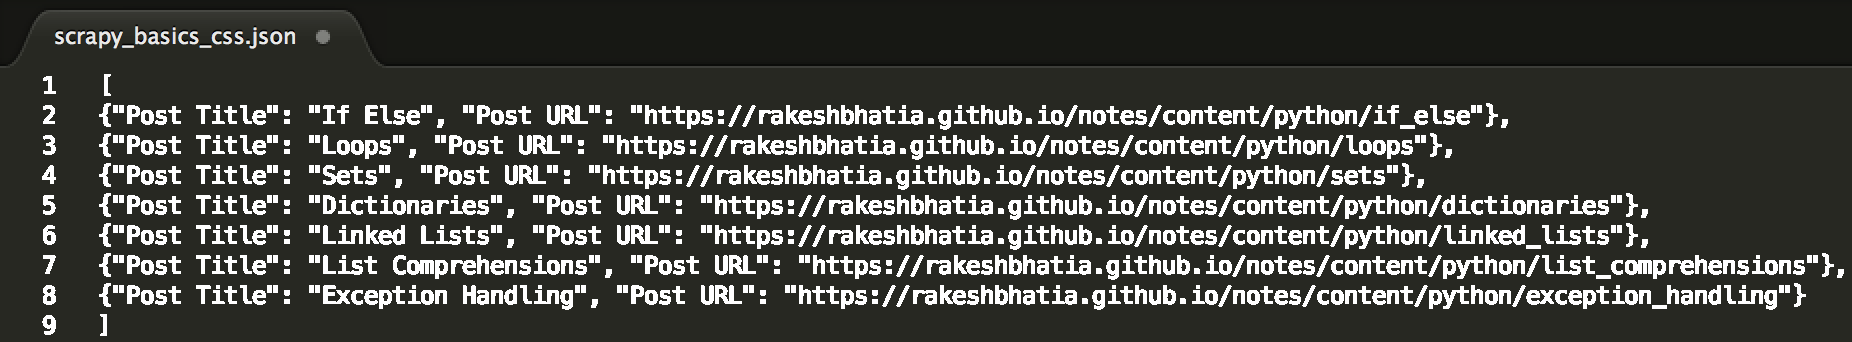

As expected, our output file is the same as before.